# U-Net Architecture

## Introduction

U-Net is a convolutional neural network that is based on the fully convolutional network and its architecture was modified and extended to work with fewer training images and to yield more precise segmentations. The architecture consists of a contracting path to capture context and a symmetric expanding path that enables precise localization. The network architecture is illustrated below:

# ![U-Net Architecture](https://lmb.informatik.uni-freiburg.de/people/ronneber/u-net/u-net-architecture.png)

## Implementation

#### Importing Libraries

In [1]:
import yaml
import torch
import torchvision
from src.u_net import UNetModel
from src.data.dataloaders import create_train_dataloader

#### Loading Configuration

Loading the configuration file (config.yaml) which contains hyperparameters and settings for the model.

The configuration is loaded into a Python dictionary for easy access.

In [2]:
# Load configuration
with open('config/config.yaml', 'r') as file:
    config = yaml.safe_load(file)

#### Visualizing the Data

Creating a data loader for the training dataset loading it in batches of 64 images

Fetching the first batch of training data to inspect the shape of the inputs and targets.


Inputs are expected to have a shape of [batch_size, channels, height, width].

In [3]:
pets_train_loader = create_train_dataloader("src/data/", 64)
(train_pets_inputs, train_pets_targets) = next(iter(pets_train_loader))
train_pets_inputs.shape, train_pets_targets.shape

(torch.Size([64, 3, 128, 128]), torch.Size([64, 1, 128, 128]))

Visualizing the inputs using the `torchvision` library.

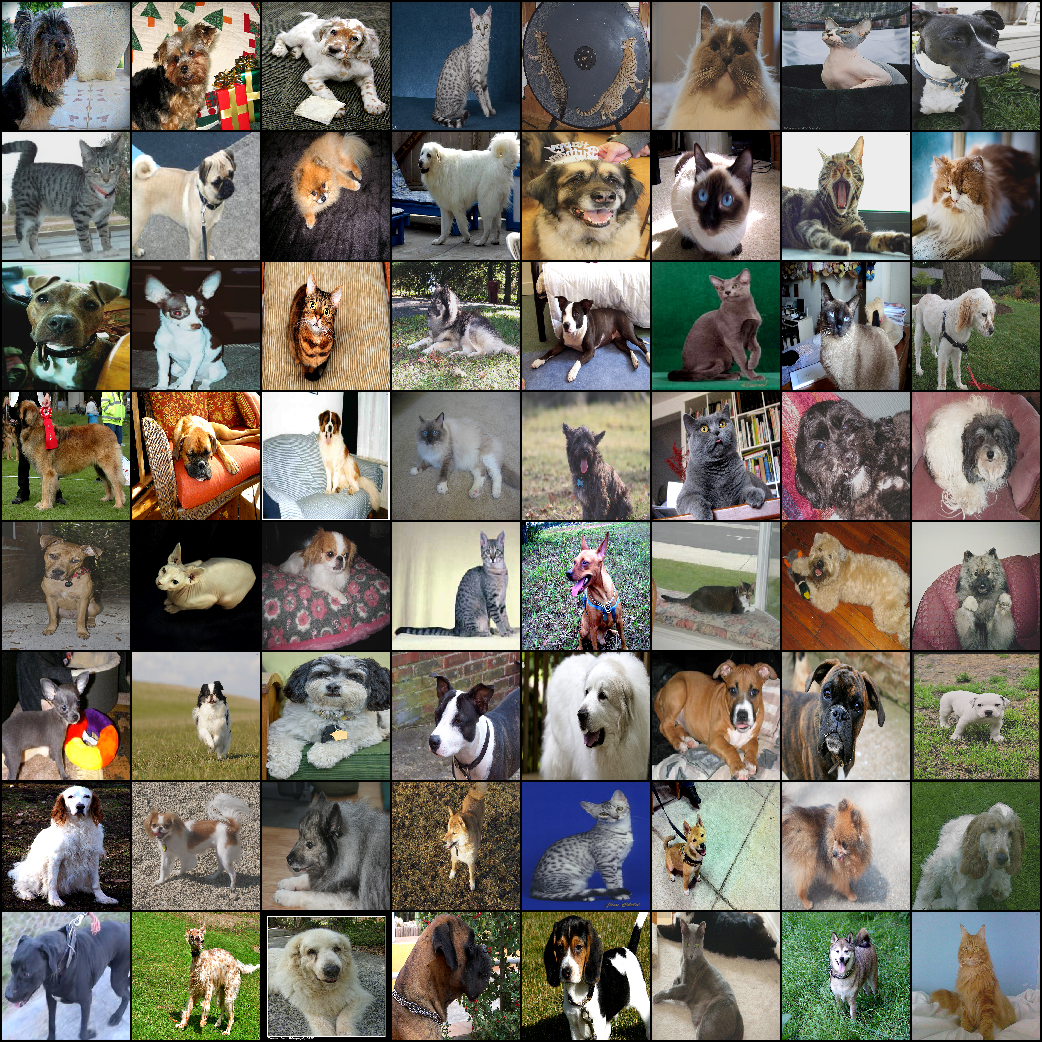

In [4]:
t2img = torchvision.transforms.ToPILImage()

pets_input_grid = torchvision.utils.make_grid(train_pets_inputs, nrow=8)
t2img(pets_input_grid)

Visualizing the targets (masks) using the `torchvision` library.

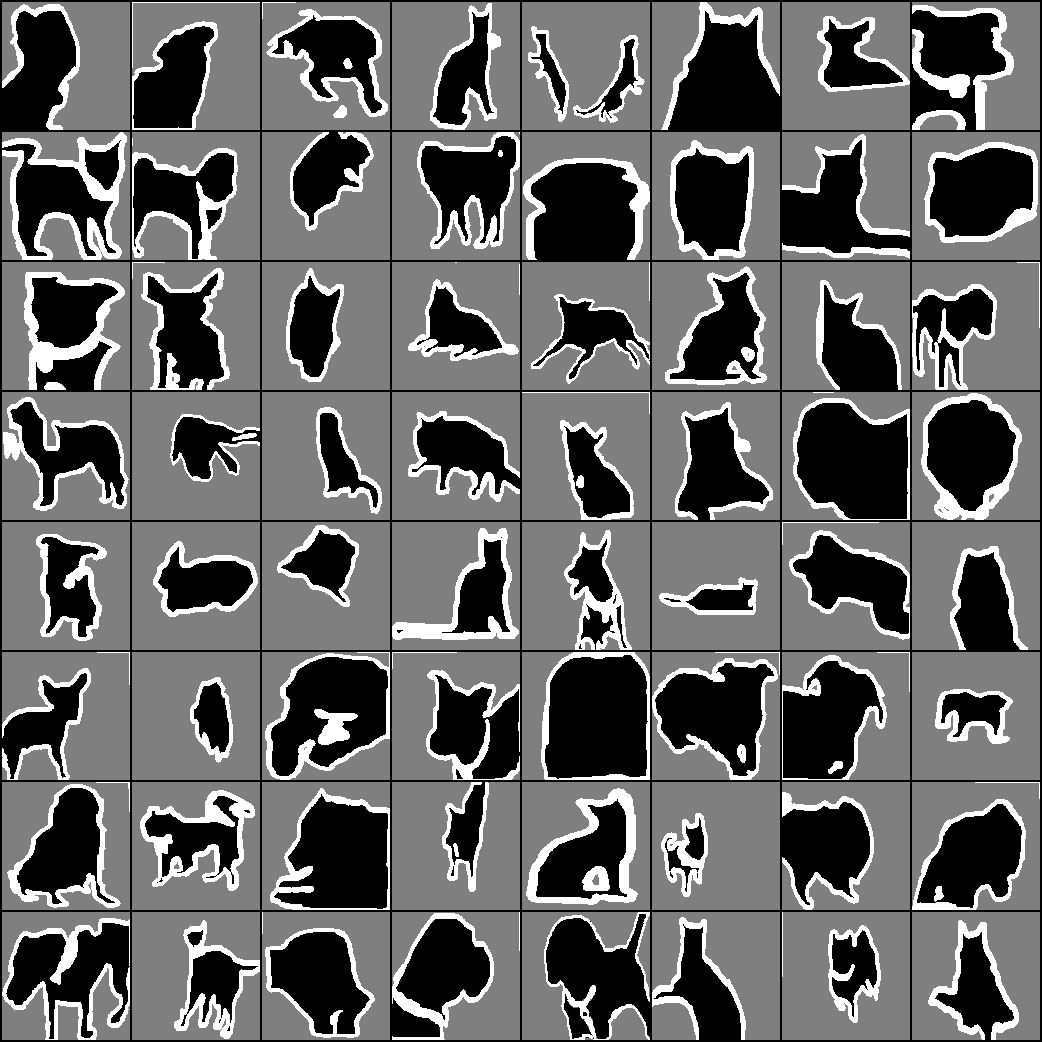

In [5]:
pets_targets_grid = torchvision.utils.make_grid(train_pets_targets / 2.0, nrow=8)
t2img(pets_targets_grid)

#### Initializing the Model

Initializing the U-Net model using the configuration loaded from the YAML file.

Data augmentation techniques such as random cropping, flipping, and normalization are applied to the training data.
This helps in improving the model's generalization ability.

The model architecture is printed to verify its structure.

In [6]:
# Initialize the model
unet_model = UNetModel(config)
print(unet_model.model)

UNet(
  (encoder1): EncoderBlock(
    (conv): ConvBlock(
      (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
    )
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (encoder2): EncoderBlock(
    (conv): ConvBlock(
      (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
    )
    (pool): MaxPool2d(k

#### Training the Model

The training loop will iterate over the data loader, compute the loss, and update the model weights.

The model will be trained for a specified number of epochs, and the performance will be monitored using validation data.

In [7]:
# Train the model
unet_model.train_UNet()

Epoch 1/15, Loss: 0.579098727168708
Epoch 2/15, Loss: 0.44270798718107157
Epoch 3/15, Loss: 0.41038517756708737
Epoch 4/15, Loss: 0.3825749508265791
Epoch 5/15, Loss: 0.36103870385679704
Epoch 6/15, Loss: 0.3399568847541151
Epoch 7/15, Loss: 0.32520135260861494
Epoch 8/15, Loss: 0.30674115028874627
Epoch 9/15, Loss: 0.29052794750394495
Epoch 10/15, Loss: 0.27740012006513004
Epoch 11/15, Loss: 0.26549204361849815
Epoch 12/15, Loss: 0.25517572102875546
Epoch 13/15, Loss: 0.24410021176625943
Epoch 14/15, Loss: 0.23526847902043113
Epoch 15/15, Loss: 0.22652493314496402


Saving the Model State Dictionary to a file. This will allow us to reaccess the model later without retraining.

In [8]:
# Save the model's state dictionary
torch.save(unet_model.model.state_dict(), 'model.pth')

In [9]:
# Reaccess the model
unet_model = UNetModel(config)

# Load the saved state dictionary
unet_model.model.load_state_dict(torch.load('model.pth', weights_only=True))

<All keys matched successfully>

#### Testing the Model

The model will be evaluated on a separate validation or test dataset.
Common evaluation metrics for segmentation tasks include IoU (Intersection over Union) and F1.

Absolute path of working_dir: C:\Users\User\Documents\U_Net_Architecture\src\data\
Absolute path of results_dir: C:\Users\User\Documents\U_Net_Architecture\src\test\results\
C:\Users\User\Documents\U_Net_Architecture\src\data\OxfordPets\test
Number of batches in test_loader: 175
Directory already exists: C:\Users\User\Documents\U_Net_Architecture\src\test\results\
Processing batch 1
Images saved successfully: C:\Users\User\Documents\U_Net_Architecture\src\test\results\input_0.png, C:\Users\User\Documents\U_Net_Architecture\src\test\results\target_0.png, C:\Users\User\Documents\U_Net_Architecture\src\test\results\output_0.png


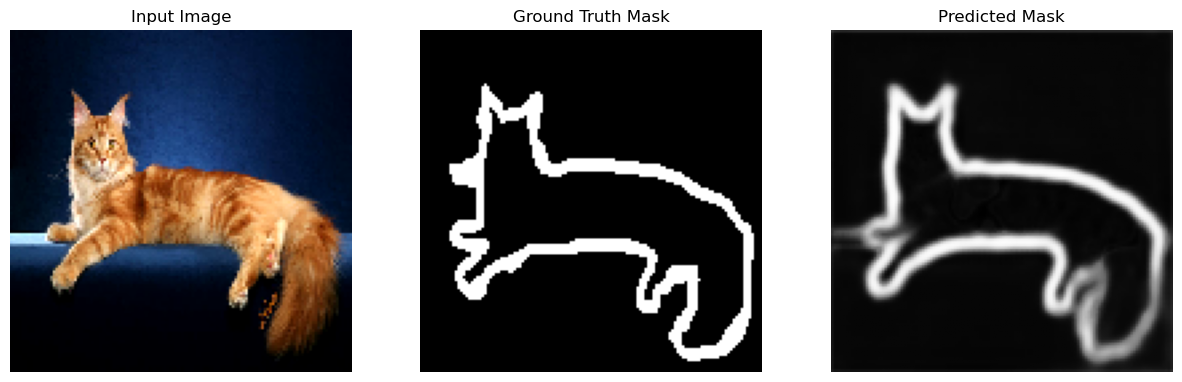

Images saved successfully: C:\Users\User\Documents\U_Net_Architecture\src\test\results\input_1.png, C:\Users\User\Documents\U_Net_Architecture\src\test\results\target_1.png, C:\Users\User\Documents\U_Net_Architecture\src\test\results\output_1.png


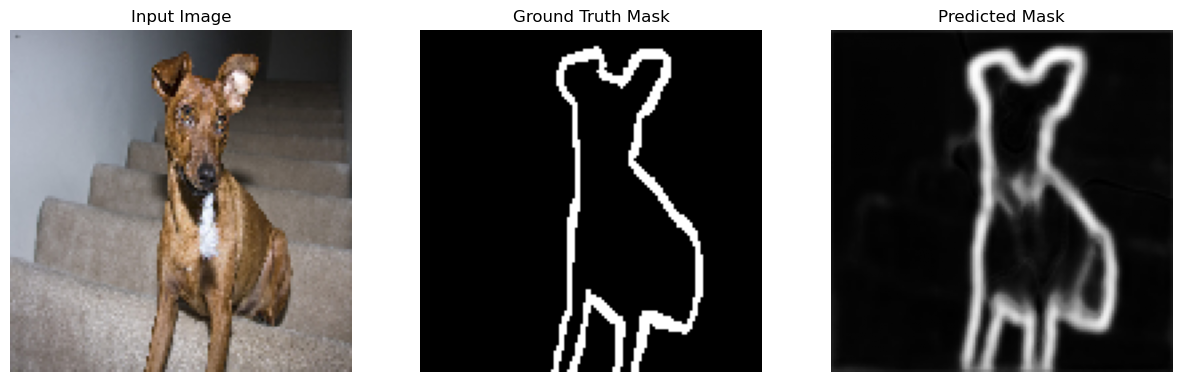

Images saved successfully: C:\Users\User\Documents\U_Net_Architecture\src\test\results\input_2.png, C:\Users\User\Documents\U_Net_Architecture\src\test\results\target_2.png, C:\Users\User\Documents\U_Net_Architecture\src\test\results\output_2.png


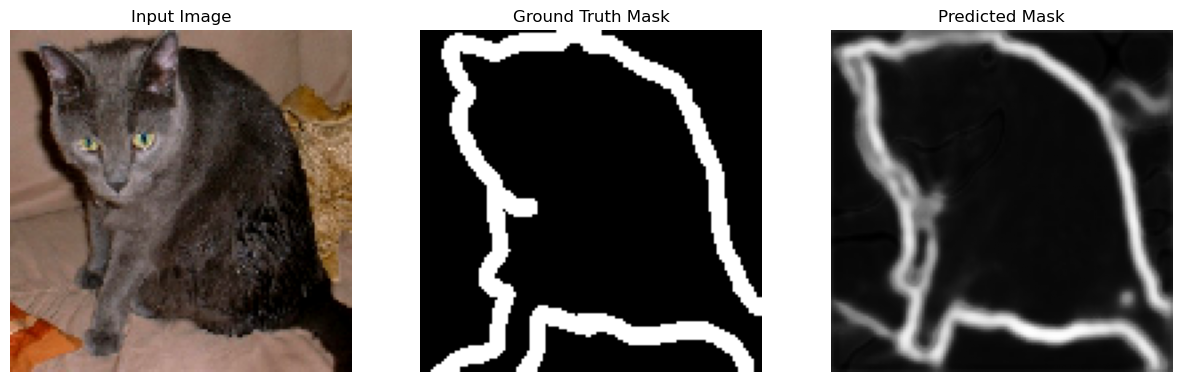

Images saved successfully: C:\Users\User\Documents\U_Net_Architecture\src\test\results\input_3.png, C:\Users\User\Documents\U_Net_Architecture\src\test\results\target_3.png, C:\Users\User\Documents\U_Net_Architecture\src\test\results\output_3.png


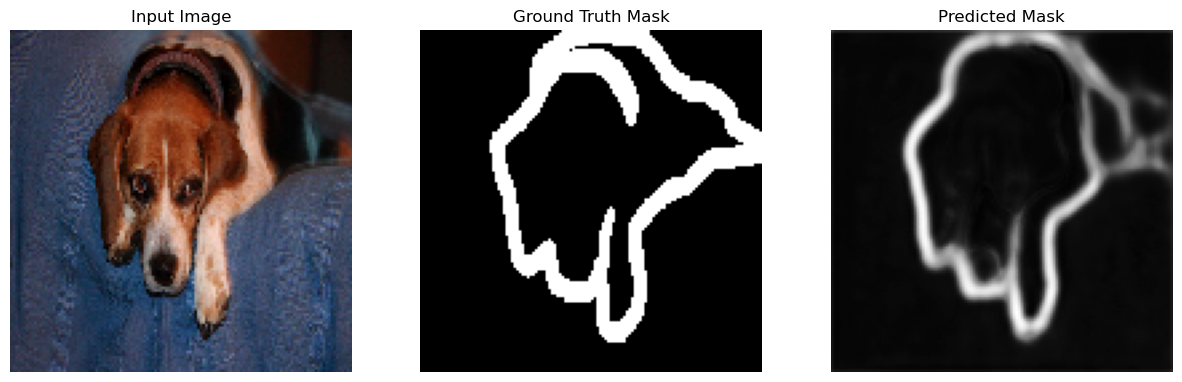

Images saved successfully: C:\Users\User\Documents\U_Net_Architecture\src\test\results\input_4.png, C:\Users\User\Documents\U_Net_Architecture\src\test\results\target_4.png, C:\Users\User\Documents\U_Net_Architecture\src\test\results\output_4.png


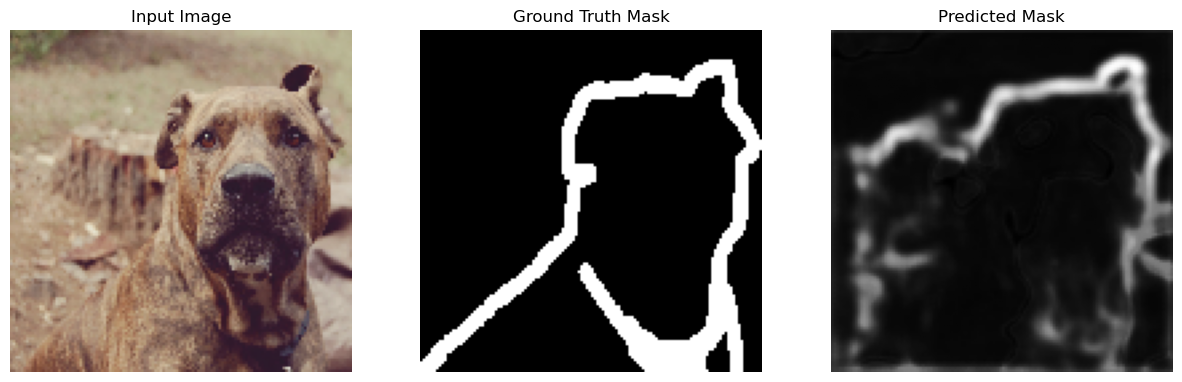

Images saved successfully: C:\Users\User\Documents\U_Net_Architecture\src\test\results\input_5.png, C:\Users\User\Documents\U_Net_Architecture\src\test\results\target_5.png, C:\Users\User\Documents\U_Net_Architecture\src\test\results\output_5.png


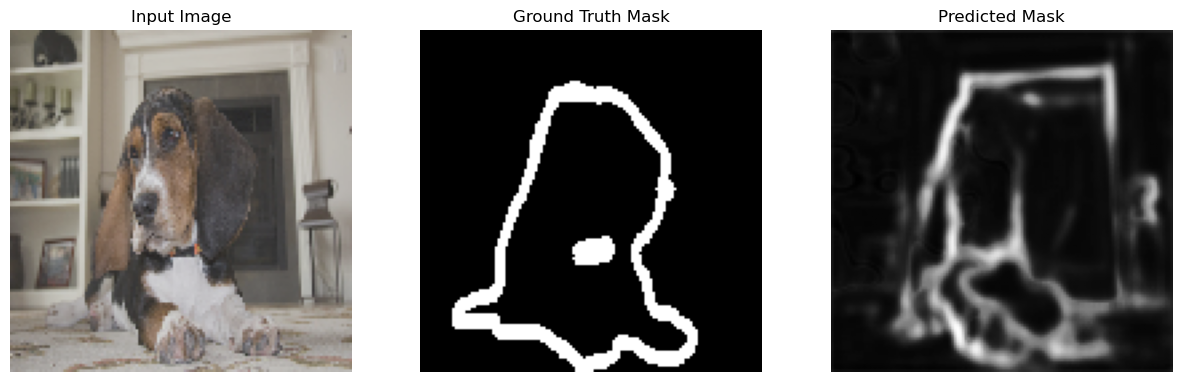

Images saved successfully: C:\Users\User\Documents\U_Net_Architecture\src\test\results\input_6.png, C:\Users\User\Documents\U_Net_Architecture\src\test\results\target_6.png, C:\Users\User\Documents\U_Net_Architecture\src\test\results\output_6.png


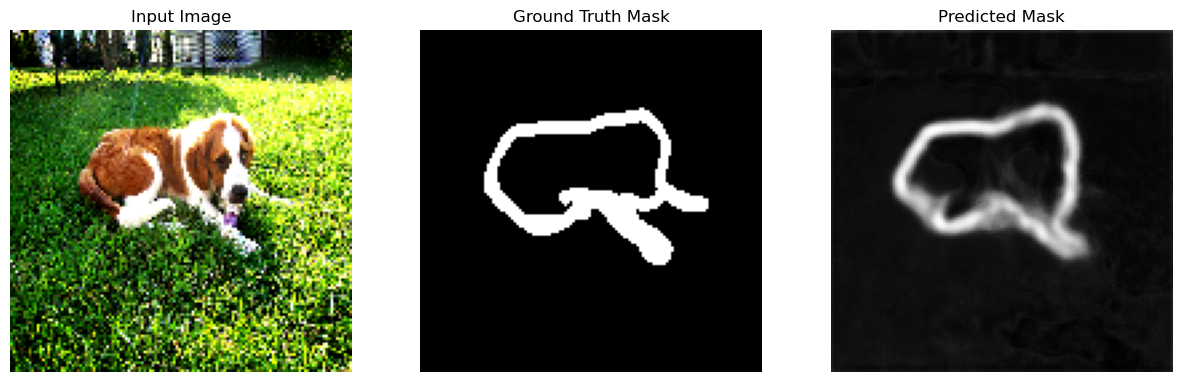

Images saved successfully: C:\Users\User\Documents\U_Net_Architecture\src\test\results\input_7.png, C:\Users\User\Documents\U_Net_Architecture\src\test\results\target_7.png, C:\Users\User\Documents\U_Net_Architecture\src\test\results\output_7.png


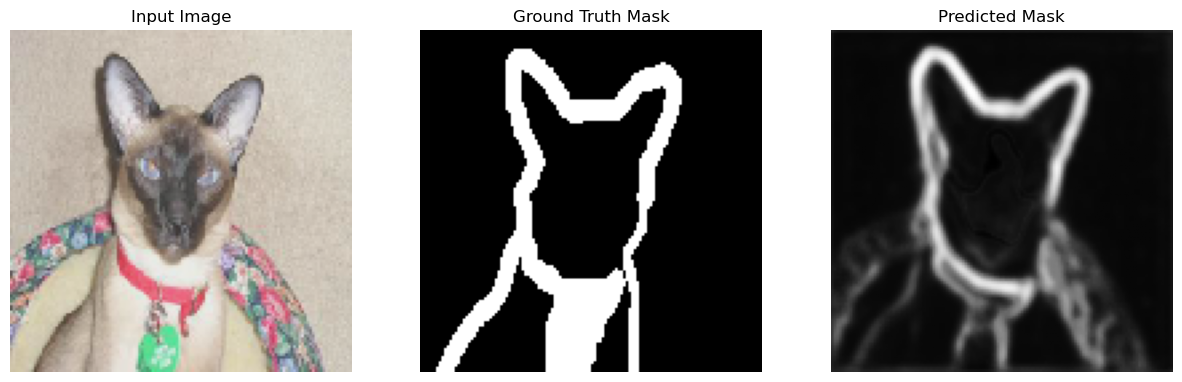

Images saved successfully: C:\Users\User\Documents\U_Net_Architecture\src\test\results\input_8.png, C:\Users\User\Documents\U_Net_Architecture\src\test\results\target_8.png, C:\Users\User\Documents\U_Net_Architecture\src\test\results\output_8.png


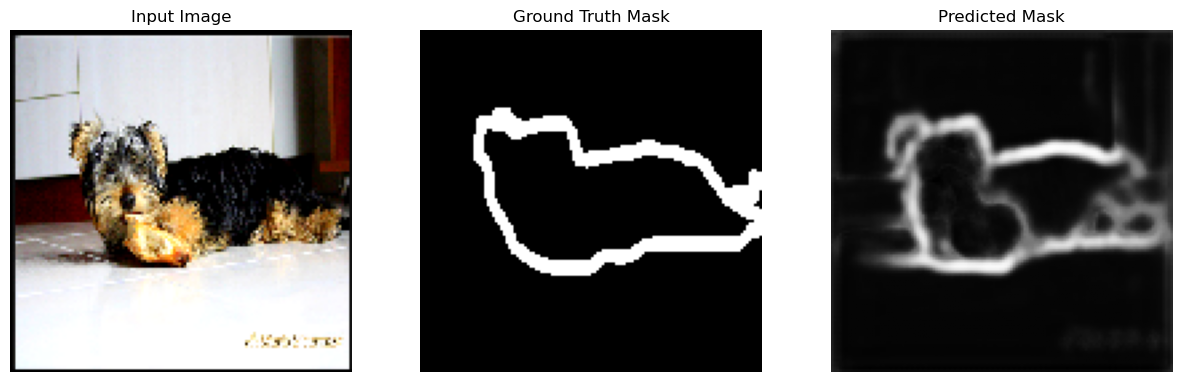

Images saved successfully: C:\Users\User\Documents\U_Net_Architecture\src\test\results\input_9.png, C:\Users\User\Documents\U_Net_Architecture\src\test\results\target_9.png, C:\Users\User\Documents\U_Net_Architecture\src\test\results\output_9.png


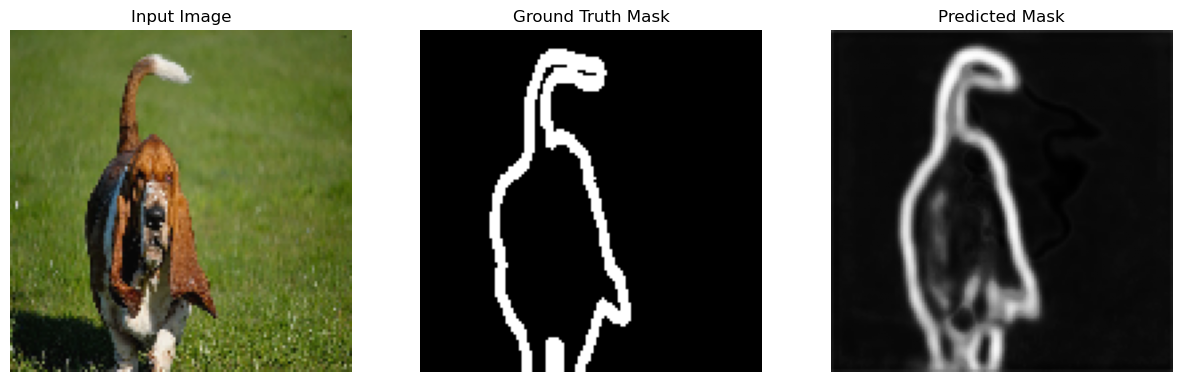

Processed batch 1
Average Precision: 0.7052672579098753
Average Recall: 0.5704764674518927
Average F1 Score: 0.630751091937083
Average IoU: 0.4606548073347815


In [10]:
# Test the model
unet_model.test_UNet()